# File Summary:

This file performs EDA on the data from Reddit using the PRAW api (politics.csv), see notebook 1.

The key part of the analysis involves looking at the urls:

There are 402 urls referenced in the democrat subreddit and 558 urls referenced in the republican subreddit. In total, there are 851 unique urls when combining the two sets of data.  This means that only 109 urls appear in both subreddits ((402+558)-851).  Therefore, I decided I wanted a lot more data.

In reviewing the PRAW documentation, I did not see a clear way to download more that the top 1000 of any given post, so I switched API's that I was using to download data.  See Notebook 3 for the data download.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# from Lab 5.02
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [2]:
# Load data

df = pd.read_csv('../Data/politics.csv')

In [3]:
df.head()

,title,score,id,url,comms_num,created,body,type,subreddit
0,Here in PA every Sunday these people gather at the roundabout. 🇺🇸 TRUMP2020,1178,jdjge9,https://v.redd.it/sm9cx0cqsvt51,106,1.603068e+09,NaN,hot,Republican
1,"John Paul is the computer repair shop owner who had Hunter Biden’s laptop. FBI has had this info for over a year & did nothing, so he turned it over to Rudy Guiliani. FBI is corrupt",671,jdgun0,https://www.reddit.com/gallery/jdgun0,125,1.603059e+09,NaN,hot,Republican
2,"Yes, It Was The 'Affordable' Care Act That Increased Premiums",382,jdg8un,https://www.forbes.com/sites/theapothecary/2017/03/22/yes-it-was-the-affordable-care-act-that-increased-premiums/#4bf75f511d25,73,1.603056e+09,NaN,hot,Republican
3,Latinos for Trump Car Rally in Miami,128,jdlhe6,https://i.redd.it/yszxdeescwt51.jpg,12,1.603075e+09,NaN,hot,Republican
4,Kids for Trump lemonade stand held by my son and nephew. They had an awesome turn out!,40,jdqhbu,https://www.reddit.com/gallery/jdqhbu,4,1.603091e+09,NaN,hot,Republican


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      7943 non-null   object 
 1   score      7943 non-null   int64  
 2   id         7943 non-null   object 
 3   url        7943 non-null   object 
 4   comms_num  7943 non-null   int64  
 5   created    7943 non-null   float64
 6   body       580 non-null    object 
 7   type       7943 non-null   object 
 8   subreddit  7943 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 558.6+ KB


## Determine the title length and title word counts

In [5]:
df['title_length'] = df['title'].apply(lambda x: len(x))

In [6]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))

In [7]:
df['url_long'] = df['url'].apply(lambda x: x.split('/'))
df['url_primary'] = df['url_long'].apply(lambda x: x[2])

In [8]:
df.head()

,title,score,id,url,comms_num,created,body,type,subreddit,title_length,title_word_count,url_long,url_primary
0,Here in PA every Sunday these people gather at the roundabout. 🇺🇸 TRUMP2020,1178,jdjge9,https://v.redd.it/sm9cx0cqsvt51,106,1.603068e+09,NaN,hot,Republican,75,13,"[https:, , v.redd.it, sm9cx0cqsvt51]",v.redd.it
1,"John Paul is the computer repair shop owner who had Hunter Biden’s laptop. FBI has had this info for over a year & did nothing, so he turned it over to Rudy Guiliani. FBI is corrupt",671,jdgun0,https://www.reddit.com/gallery/jdgun0,125,1.603059e+09,NaN,hot,Republican,181,36,"[https:, , www.reddit.com, gallery, jdgun0]",www.reddit.com
2,"Yes, It Was The 'Affordable' Care Act That Increased Premiums",382,jdg8un,https://www.forbes.com/sites/theapothecary/2017/03/22/yes-it-was-the-affordable-care-act-that-increased-premiums/#4bf75f511d25,73,1.603056e+09,NaN,hot,Republican,61,10,"[https:, , www.forbes.com, sites, theapothecary, 2017, 03, 22, yes-it-was-the-affordable-care-act-that-increased-premiums, #4bf75f511d25]",www.forbes.com
3,Latinos for Trump Car Rally in Miami,128,jdlhe6,https://i.redd.it/yszxdeescwt51.jpg,12,1.603075e+09,NaN,hot,Republican,36,7,"[https:, , i.redd.it, yszxdeescwt51.jpg]",i.redd.it
4,Kids for Trump lemonade stand held by my son and nephew. They had an awesome turn out!,40,jdqhbu,https://www.reddit.com/gallery/jdqhbu,4,1.603091e+09,NaN,hot,Republican,86,17,"[https:, , www.reddit.com, gallery, jdqhbu]",www.reddit.com


## Review the urls

In [9]:
rep_url_vcs = df[df['subreddit'] == 'Republican']['url_primary'].value_counts()

In [10]:
rep_url_vcs[rep_url_vcs > 5]

i.redd.it                     621
www.reddit.com                273
www.foxnews.com               151
www.breitbart.com             122
v.redd.it                     121
                             ... 
www.conservativereview.com      6
www.nytimes.com                 6
files.catbox.moe                6
www.city-journal.org            6
www.cnn.com                     6
Name: url_primary, Length: 80, dtype: int64

<BarContainer object of 80 artists>

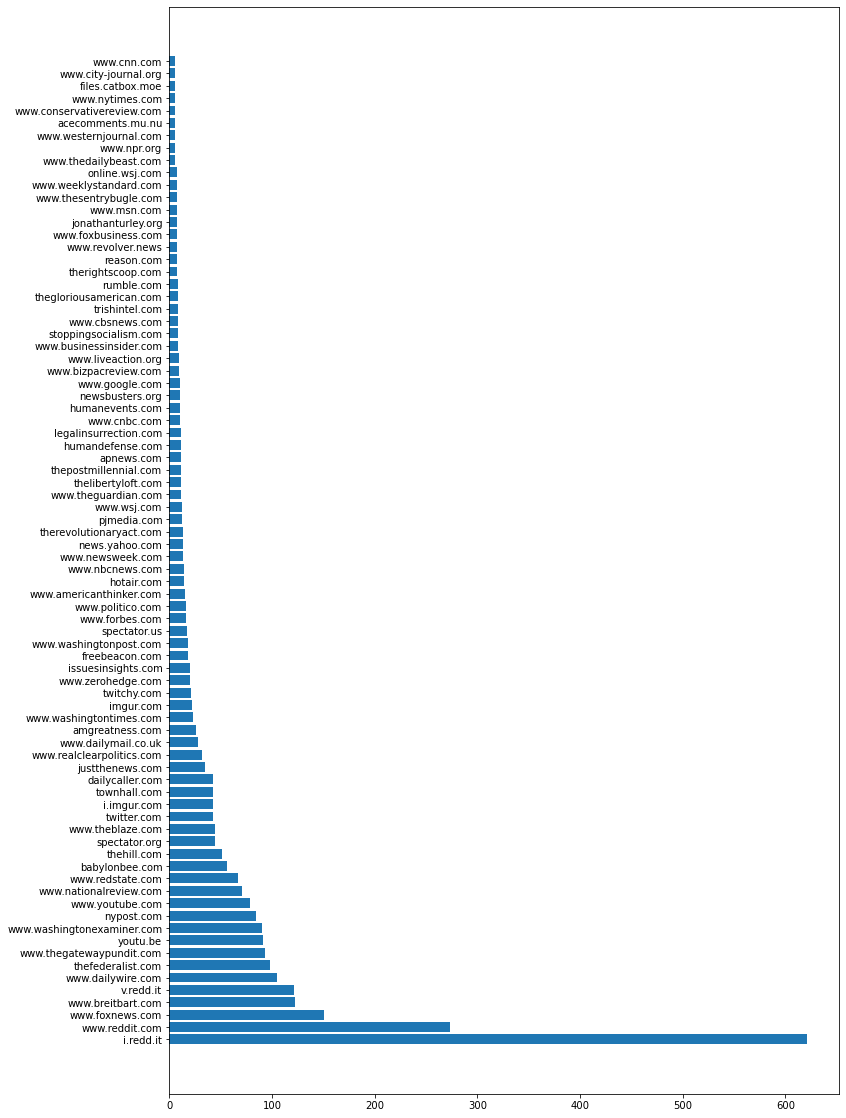

In [11]:
plt.figure(figsize = (12,20))
plt.barh(rep_url_vcs[rep_url_vcs > 5].index, rep_url_vcs[rep_url_vcs > 5])

In [12]:
dem_url_vcs = df[df['subreddit'] == 'democrats']['url_primary'].value_counts()

In [13]:
dem_url_vcs[dem_url_vcs > 5]

i.redd.it                802
www.reddit.com           431
twitter.com              249
i.imgur.com              185
youtu.be                 163
                        ... 
www.esquire.com            6
theintercept.com           6
bluenationreview.com       6
www.vice.com               6
store.floridadems.org      6
Name: url_primary, Length: 70, dtype: int64

<BarContainer object of 70 artists>

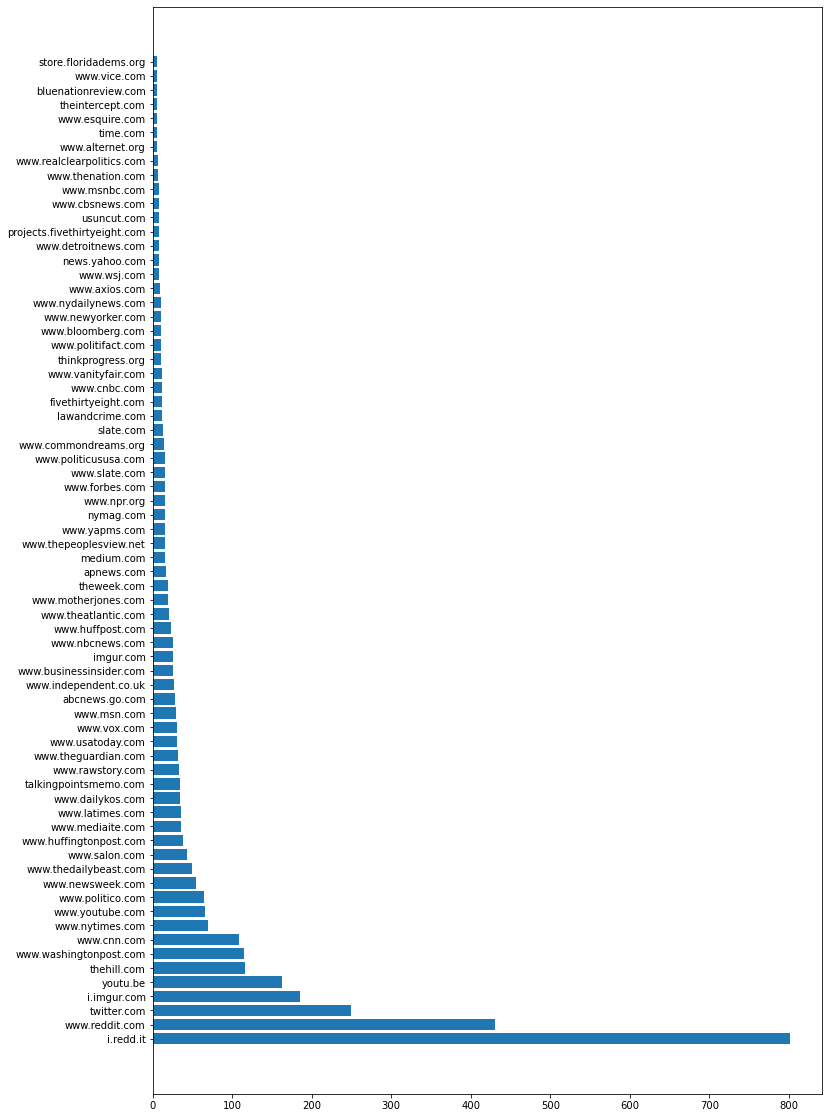

In [14]:
plt.figure(figsize = (12,20))
plt.barh(dem_url_vcs[dem_url_vcs > 5].index, dem_url_vcs[dem_url_vcs > 5])

In [15]:
dem_url_vcs.rename('dem_url_primary',inplace=True)

i.redd.it                802
www.reddit.com           431
twitter.com              249
i.imgur.com              185
youtu.be                 163
                        ... 
commondreams.org           1
whotv.com                  1
politics.blog.ajc.com      1
www.newsday.com            1
youtube.com                1
Name: dem_url_primary, Length: 402, dtype: int64

In [16]:
rep_url_vcs.rename('rep_url_primary',inplace = True)

i.redd.it                       621
www.reddit.com                  273
www.foxnews.com                 151
www.breitbart.com               122
v.redd.it                       121
                               ... 
downtrend.com                     1
www.the-lighthouse.net            1
www.denverpost.com                1
articles.businessinsider.com      1
youtube.com                       1
Name: rep_url_primary, Length: 558, dtype: int64

In [17]:
all_url_prim = pd.concat([dem_url_vcs,rep_url_vcs], axis=1)

In [18]:
all_url_prim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, i.redd.it to articles.businessinsider.com
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dem_url_primary  402 non-null    float64
 1   rep_url_primary  558 non-null    float64
dtypes: float64(2)
memory usage: 19.9+ KB


In [19]:
# because the na's are created for a column that didn't have any posts for that one, replace with 0 is reasonable here

all_url_prim = all_url_prim.fillna(0)

In [20]:
all_url_prim.head(5)

,dem_url_primary,rep_url_primary
i.redd.it,802.0,621.0
www.reddit.com,431.0,273.0
twitter.com,249.0,43.0
i.imgur.com,185.0,43.0
youtu.be,163.0,91.0


In [21]:
all_url_prim['rep_url_primary']

i.redd.it                       621.0
www.reddit.com                  273.0
twitter.com                      43.0
i.imgur.com                      43.0
youtu.be                         91.0
                                ...  
www.flickr.com                    1.0
mynewsguru.com                    1.0
downtrend.com                     1.0
www.the-lighthouse.net            1.0
articles.businessinsider.com      1.0
Name: rep_url_primary, Length: 851, dtype: float64

In [28]:
all_url_prim.head()

,dem_url_primary,rep_url_primary
i.redd.it,802.0,621.0
www.reddit.com,431.0,273.0
twitter.com,249.0,43.0
i.imgur.com,185.0,43.0
youtu.be,163.0,91.0


In [31]:
all_url_prim['both'] = all_url_prim['rep_url_primary'].copy() + all_url_prim['dem_url_primary'].copy()
all_url_prim.head()

,dem_url_primary,rep_url_primary,both
i.redd.it,802.0,621.0,1423.0
www.reddit.com,431.0,273.0,704.0
twitter.com,249.0,43.0,292.0
i.imgur.com,185.0,43.0,228.0
youtu.be,163.0,91.0,254.0


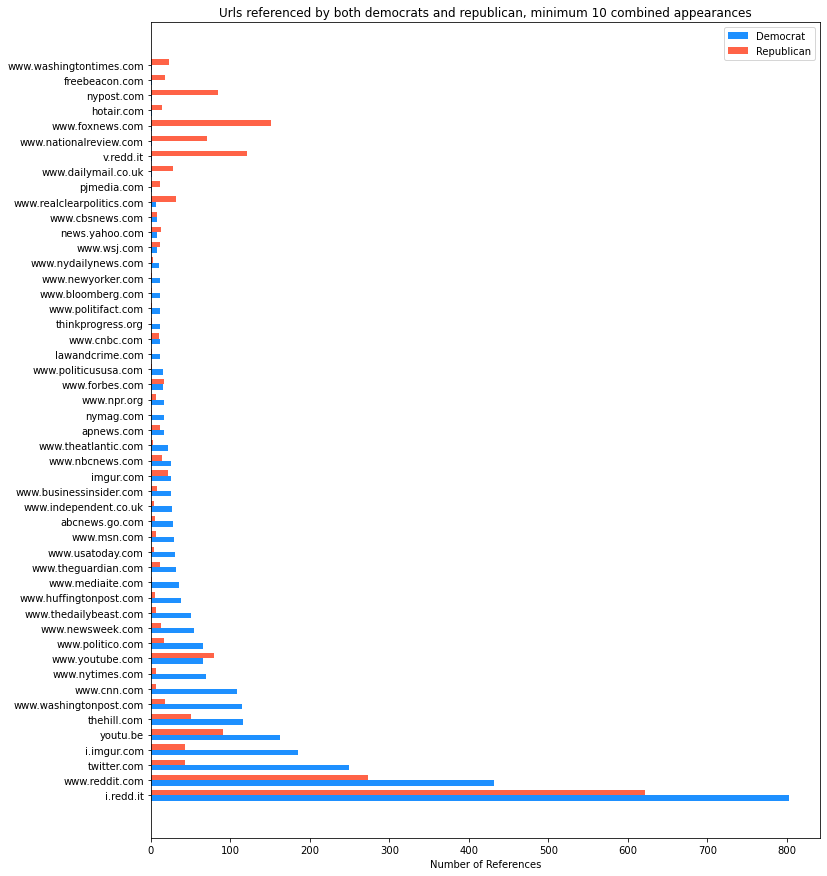

In [79]:
# reduce size of dataframe, so only plotting rows with more values (so easier to visualize)
min_num_appearances_both = 10
min_num_appearances_indiv = 1

both_appearance = (all_url_prim['both'] > min_num_appearances_both)
dem_appearance = (all_url_prim['dem_url_primary'] >= min_num_appearances_indiv)
rep_appearance = (all_url_prim['rep_url_primary'] >= min_num_appearances_indiv)

reduced_url_prim = all_url_prim[(both_appearance) & (dem_appearance) & (rep_appearance)] 


# from https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

labels = list(reduced_url_prim.index)
dem_urls = reduced_url_prim['dem_url_primary']
rep_urls = reduced_url_prim['rep_url_primary']

y = np.arange(len(labels))  # the label locations
height = .35  # the width of the bars

plt.figure(figsize = (12,15))
plt.barh(y - (height/2), dem_urls, height, color='dodgerblue', label='Democrat')
plt.barh(y + (height/2), rep_urls, height, color='tomato', label='Republican')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Number of References')
plt.title('Urls referenced by both democrats and republican, minimum 10 combined appearances')
plt.yticks(ticks = y,labels = labels)
plt.legend()


fig.tight_layout()

plt.show()

### There are 402 urls referenced in the democrat subreddit and 558 urls referenced in the republican subreddit.

### Of these there are 851 total unique urls, so (402+558)-851 would indicate how many urls appear in both subreddits.  This means that only 109 urls are in both subreddits, so I decided I need more data.

### Of those that appear in both subreddits, most have less than 100 references for any given url (as seen in the graph above), so this confirms I need more data.